In [1]:
import sys
!{sys.executable} -m pip install pandas

In [15]:
import pandas as pd
import json

import ast
from collections import Counter

import nltk
from nltk.corpus import stopwords

import re

nltk.download('stopwords')

data = pd.read_csv('one.csv')

# The next line cleans the data by removing duplicate lines.
data.drop_duplicates(inplace = True)

data['Published At'] = pd.to_datetime(data['Published At'])

time_periods = [
    ('2020', '2020-01-01', '2020-12-31'),
    ('2021', '2021-01-01', '2021-12-31'),
    ('2022', '2022-01-01', '2022-12-31'),
    ('2023', '2023-01-01', '2023-12-31'),
    ('2024', '2024-01-01', '2024-12-31'),
    ('2025', '2025-01-01', '2025-12-31'),
]
result = {}

for name, start, end in time_periods:
    filter = (data['Published At'] >= start) & (data['Published At'] <= end)
    filtered = data[filter]

    text = ' '.join(filtered['TOP 10 comments'].astype(str).tolist())

    text = re.sub(r"[\(\)\[\]',\"]", "", text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # entfernt alles, was kein Buchstabe oder Leerzeichen ist
    text = text.lower()

    stop_words = set(stopwords.words('english'))
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]

    keywords = Counter(filtered_words).most_common(15)

    result[name] = {
        'keywords' : (keywords)
    }

with open('answer_one.json', 'w', encoding='utf-8') as file:
    json.dump(result, file, indent=2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\49152\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


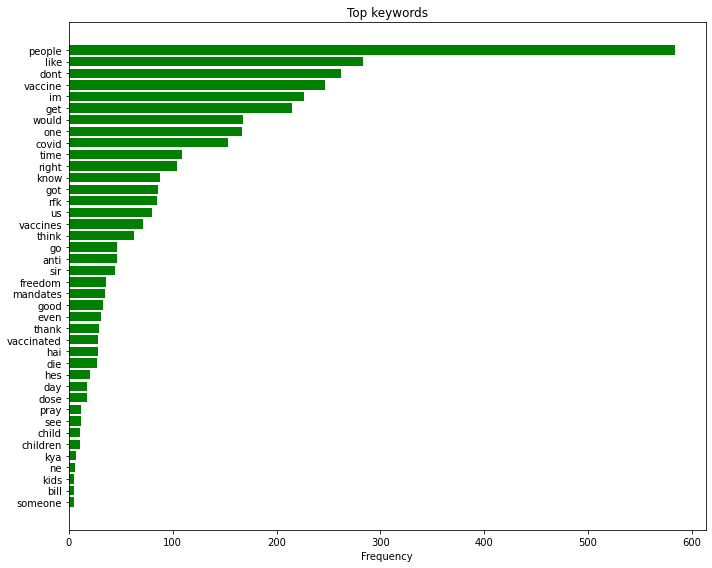

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

import json
from collections import defaultdict

with open('answer_one.json', 'r', encoding='utf-8') as file:
    keywords = json.load(file)

frequencies_all_years = defaultdict(int)

for year, content in keywords.items():
    for keyword, frequency in content['keywords']:
        frequencies_all_years[keyword] += frequency

data = pd.DataFrame(frequencies_all_years.items(), columns=['Keyword', 'Frequency'])
data = data.sort_values(by='Frequency', ascending=True)

plt.figure(figsize=(10,8))
plt.barh(data['Keyword'], data['Frequency'], color='green')
plt.xlabel('Frequency')
plt.title(f'Top keywords')
plt.tight_layout()
plt.show()

